In [1]:
from collections import Counter

import matplotlib.pyplot as plt
from keras.layers import Embedding, Dense, Flatten
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

/home/jacquerie/.envs/keras/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
texts, labels = [], []

with open('data.txt') as f:
    for line in f:
        text, label = line.strip().split(' ENDABSTRACTS ')
        
        text = text.replace(' ENDABSTRACT ', '. ')
        text = text.replace(' ENDTITLE ', '. ')
        text = text.replace(' ENDTITLES ', '. ')
        
        if label == 'CORE':
            label = 1
        elif label == 'Non-CORE':
            label = 0
        elif label == 'Rejected':
            label = -1
        
        texts.append(text)
        labels.append(label)

In [3]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=100)

In [4]:
labels = to_categorical(labels, num_classes=3)

In [5]:
training_samples = 3 * len(data) // 5
validation_samples = len(data) // 5

In [6]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]
x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]

In [7]:
Counter(y.argmax() for y in y_train)

Counter({0: 1455, 1: 1628, 2: 18335})

In [8]:
model = Sequential()
model.add(Embedding(10000, 100, input_length=100))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,321,187
Trainable params: 1,321,187
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [10]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, class_weight={0: 12.60, 1: 11.26, 2: 1.0}, validation_data=(x_val, y_val))

Train on 21418 samples, validate on 7139 samples
Epoch 1/10
21418/21418 [==============================] - 13s 614us/step - loss: 2.2606 - acc: 0.7630 - val_loss: 0.6405 - val_acc: 0.7692
Epoch 2/10
21418/21418 [==============================] - 13s 620us/step - loss: 1.2593 - acc: 0.8310 - val_loss: 0.4206 - val_acc: 0.8532
Epoch 3/10
21418/21418 [==============================] - 14s 644us/step - loss: 0.4219 - acc: 0.9485 - val_loss: 0.5406 - val_acc: 0.8428
Epoch 4/10
21418/21418 [==============================] - 15s 682us/step - loss: 0.2122 - acc: 0.9815 - val_loss: 0.5408 - val_acc: 0.8518
Epoch 5/10
21418/21418 [==============================] - 14s 631us/step - loss: 0.1534 - acc: 0.9885 - val_loss: 0.6098 - val_acc: 0.8547
Epoch 6/10
21418/21418 [==============================] - 12s 576us/step - loss: 0.1182 - acc: 0.9910 - val_loss: 0.7663 - val_acc: 0.8605
Epoch 7/10
21418/21418 [==============================] - 10s 465us/step - loss: 0.1164 - acc: 0.9920 - val_loss: 0.7

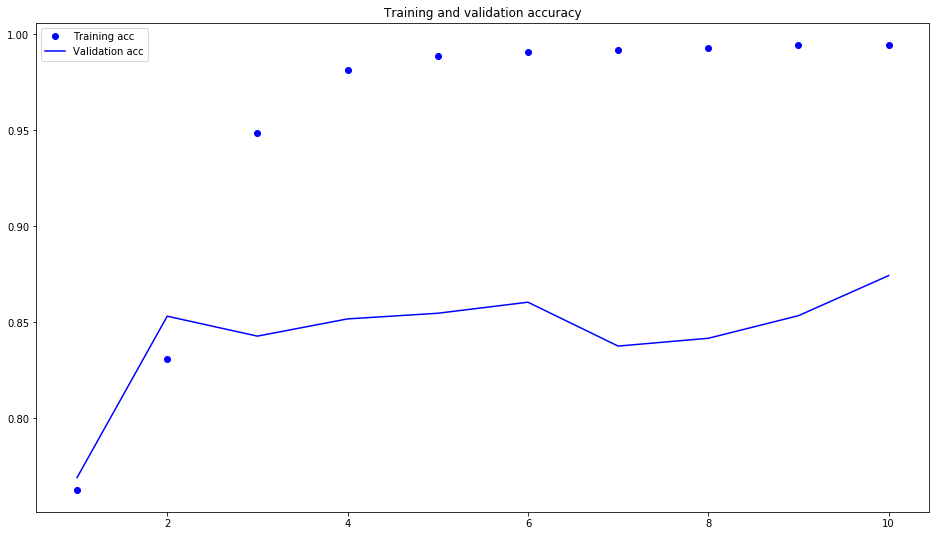

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [12]:
model = Sequential()
model.add(Embedding(10000, 100, input_length=100))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 1,321,187
Trainable params: 1,321,187
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [14]:
history = model.fit(x_train, y_train, epochs=3, batch_size=32, class_weight={0: 12.60, 1: 11.26, 2: 1.0}, validation_data=(x_val, y_val))

Train on 21418 samples, validate on 7139 samples
Epoch 1/3
21418/21418 [==============================] - 10s 486us/step - loss: 2.2712 - acc: 0.7611 - val_loss: 0.5524 - val_acc: 0.8385
Epoch 2/3
21418/21418 [==============================] - 10s 465us/step - loss: 1.2021 - acc: 0.8460 - val_loss: 0.5420 - val_acc: 0.7983
Epoch 3/3
21418/21418 [==============================] - 10s 471us/step - loss: 0.3654 - acc: 0.9559 - val_loss: 0.5205 - val_acc: 0.8678


In [15]:
_, acc = model.evaluate(x_test, y_test)

7141/7141 [==============================] - 0s 56us/step


In [16]:
acc

0.8722867945665873